## Breast Cancer predictor 
#### This notebook will explore sklearn's built in breast cancer dataset to build a classifcation predictor
##### The breast cancer dataset is taken from a 1995 study done by UCI ML Breast Cancer Wisconsin (Diagnostic)

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import re

cancer = load_breast_cancer()

###### The following cell prints the full description of the dataset

In [2]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# let get some basic summary of the data 
data = pd.DataFrame(data = cancer.data, columns = cancer['feature_names'])
data = data.loc[:, ~data.columns.str.contains('worst|error')]
data['target'] = pd.Series(cancer.target)

print("shape of dataset (#row, #columns)", data.shape) 
print("features:", data.columns)
data.head()

shape of dataset (#row, #columns) (569, 11)
features: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'target'],
      dtype='object')


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean radius             569 non-null    float64
 1   mean texture            569 non-null    float64
 2   mean perimeter          569 non-null    float64
 3   mean area               569 non-null    float64
 4   mean smoothness         569 non-null    float64
 5   mean compactness        569 non-null    float64
 6   mean concavity          569 non-null    float64
 7   mean concave points     569 non-null    float64
 8   mean symmetry           569 non-null    float64
 9   mean fractal dimension  569 non-null    float64
 10  target                  569 non-null    int32  
dtypes: float64(10), int32(1)
memory usage: 46.8 KB


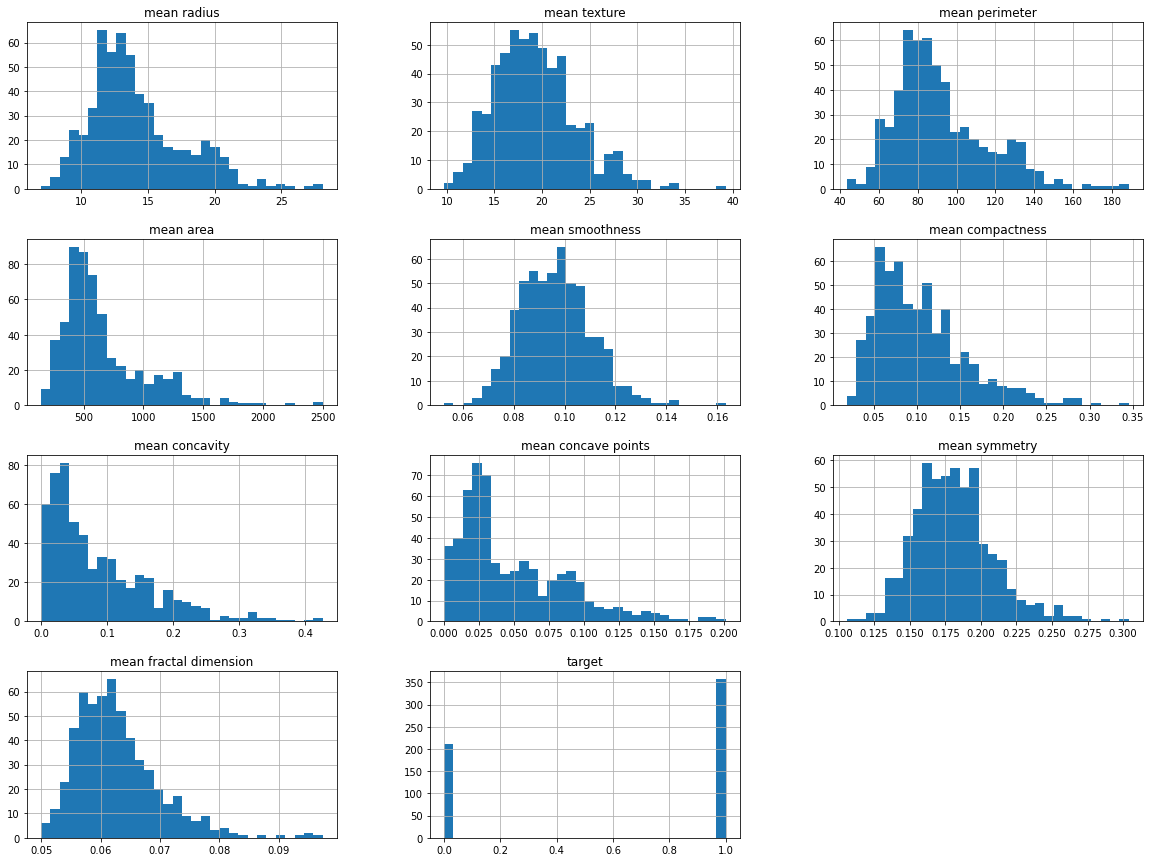

In [5]:
data.hist(bins = 30, figsize =(20,15))
plt.show()

In [6]:
# target variable is predicting whether a cancer cell is malignant or benign

malignant = (data['target'] == 0).sum()
benign = (data['target']== 1).sum()

print( '# of mailgnant cancer cells in dataset:', malignant)
print('# of benign cancer cells in dataset:', benign)

# of mailgnant cancer cells in dataset: 212
# of benign cancer cells in dataset: 357


In [7]:
#split the data into test and training sets
train, test = train_test_split(data, random_state = 42)

#### Analysis on the training set

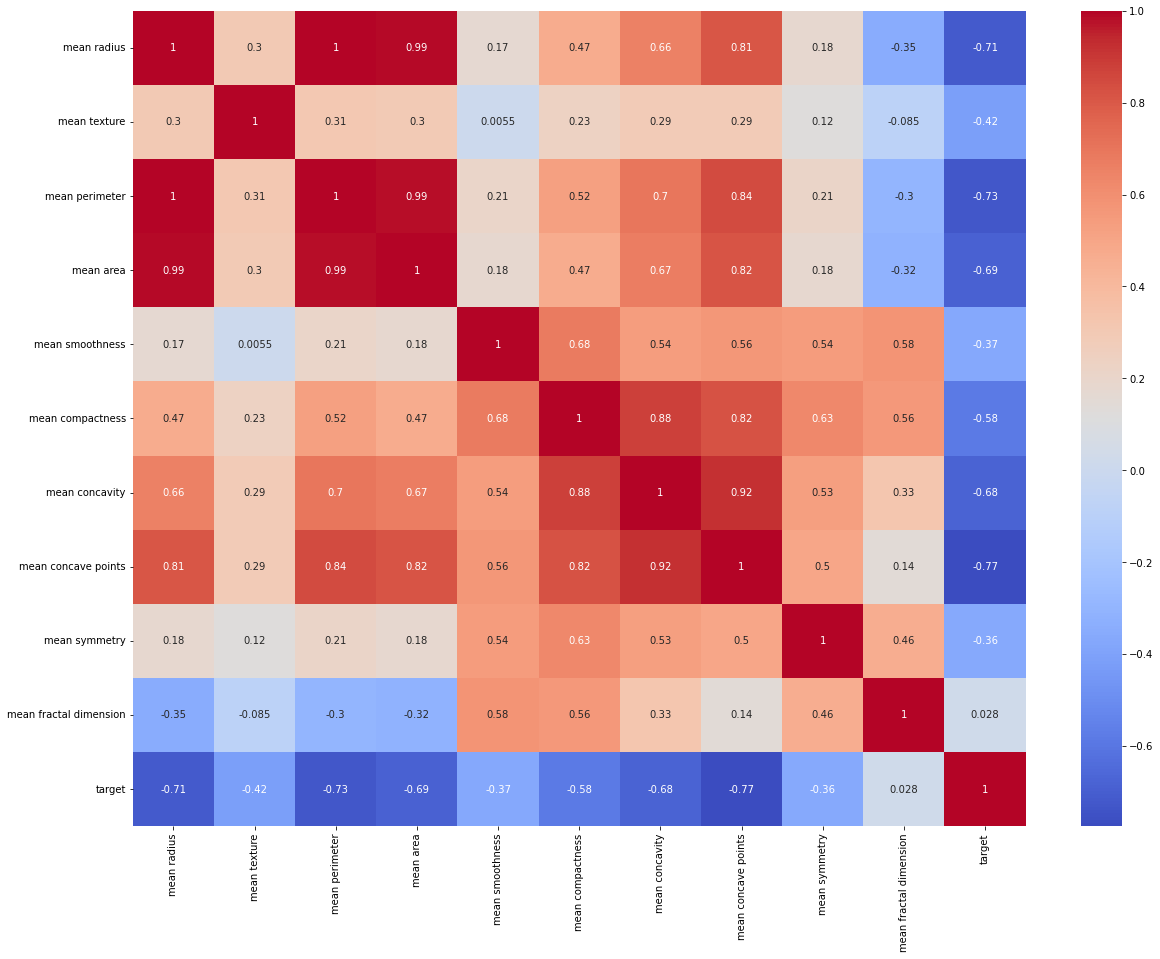

In [8]:
corr_matrix = train.corr()

plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap="coolwarm", annot = True)
plt.show()

In [9]:
# as perimeter and radius are highly correlated and mathmatically related will remove radius 
train = train.drop(columns = ['mean radius'])
test = test.drop(columns = ['mean radius'])

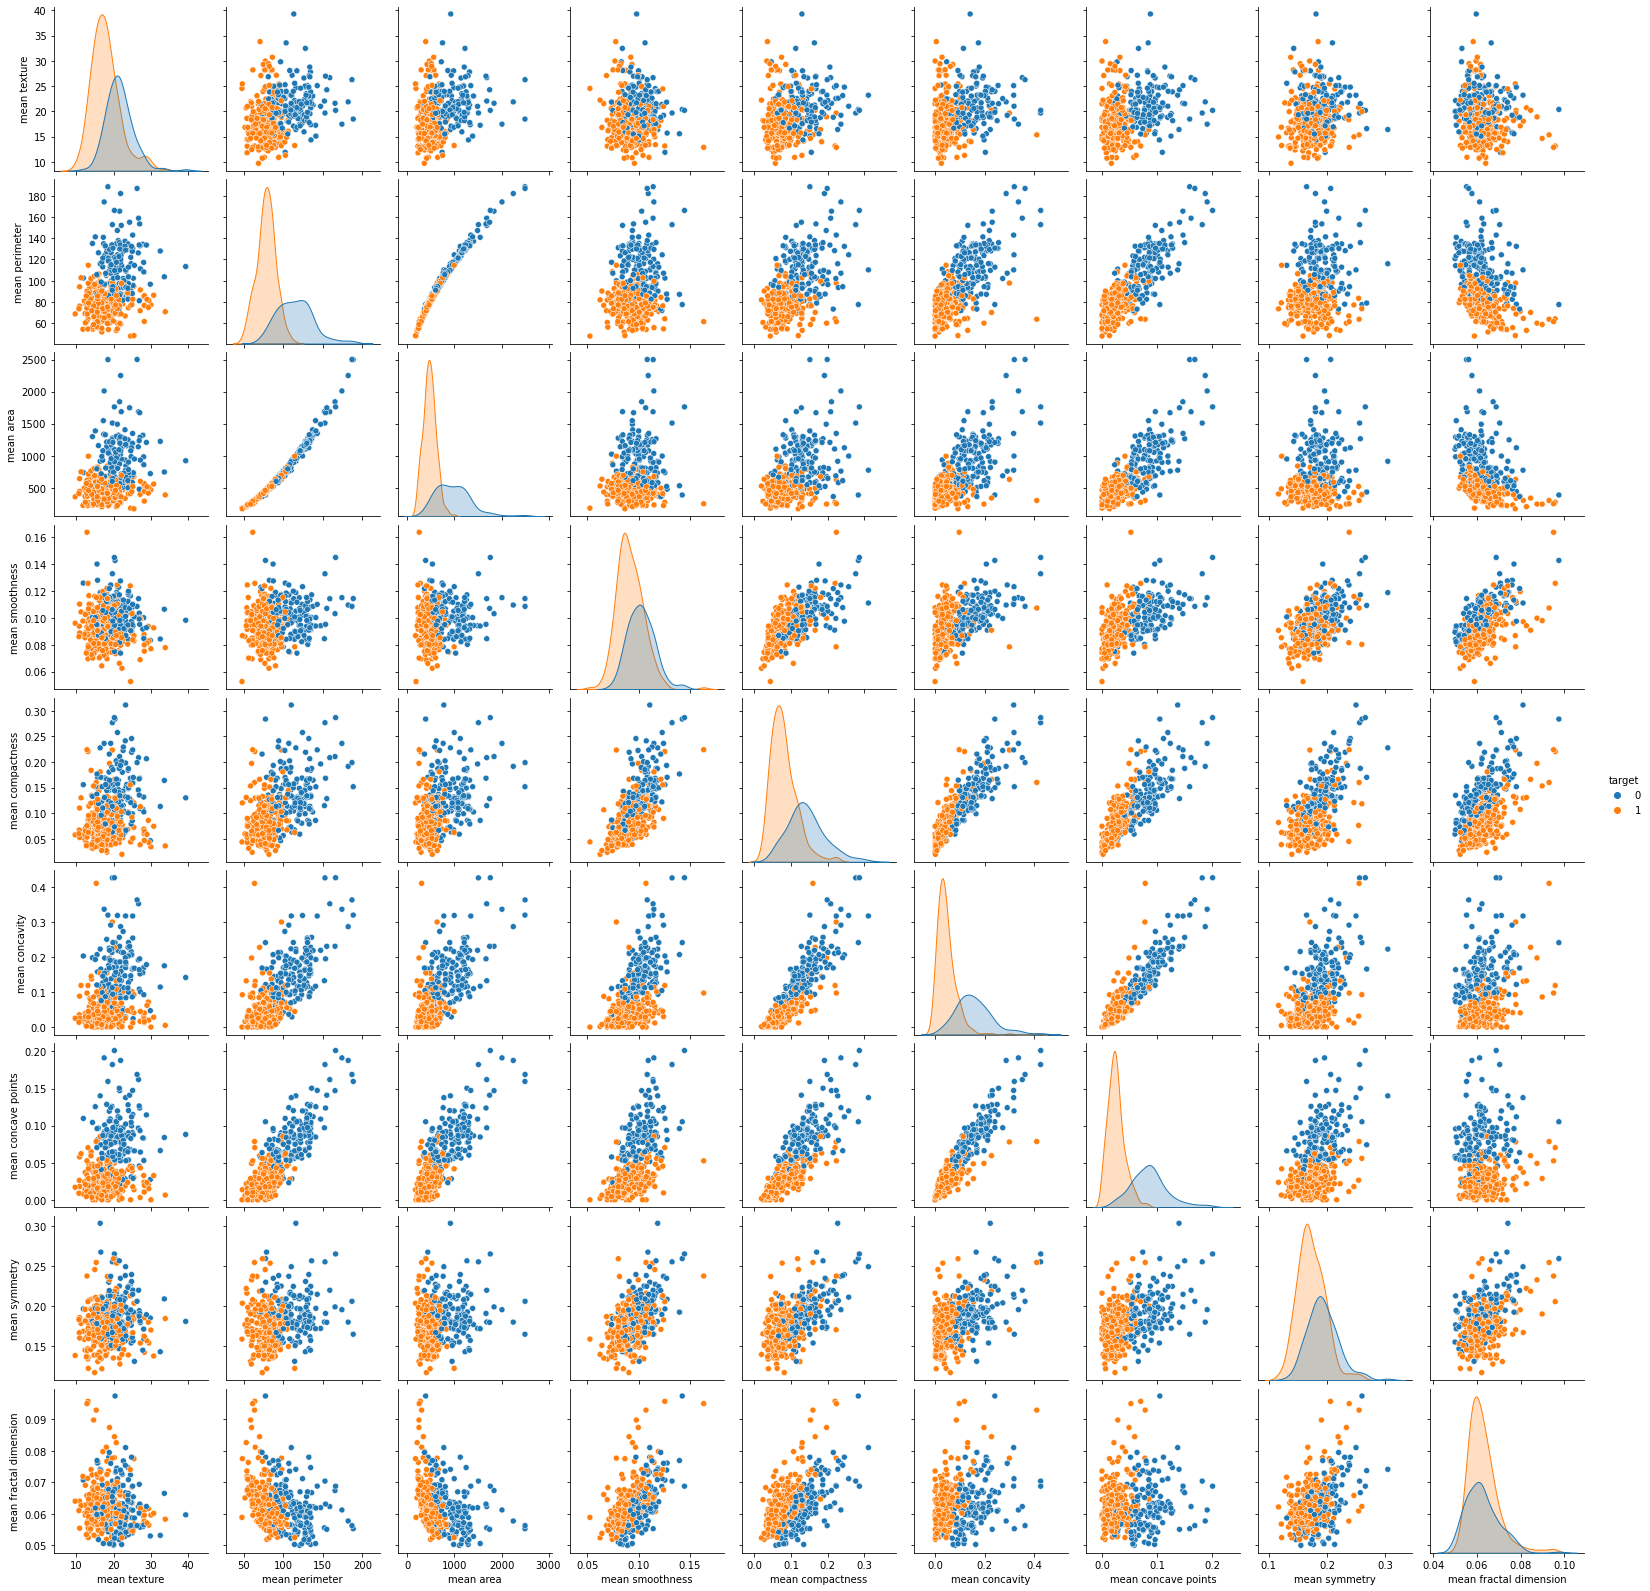

In [10]:
sns.pairplot(train, hue='target')
plt.show()

In [11]:
def print_model_scores(clf, X_train, y_train, X_test, y_test, train = True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Model testing

In [12]:
X_train = train.drop(columns = "target")
y_train = train['target']
X_test = test.drop(columns = "target")
y_test = test['target']

#### KNN Classifier

Maximum Accuracy: 92.31% at K = 4


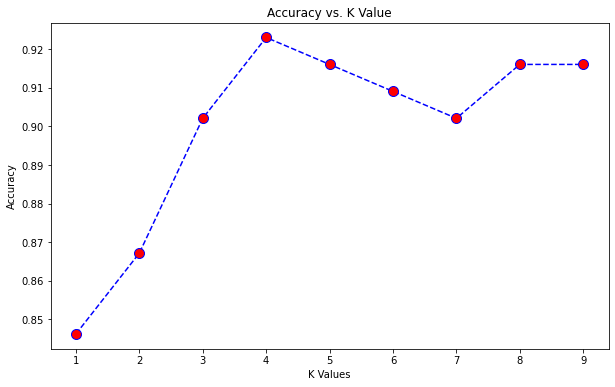

In [13]:
from sklearn.neighbors import KNeighborsClassifier

acc = []
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
print("Maximum Accuracy:","{:.2%}".format(max(acc)),"at K =",acc.index(max(acc))+1)
optimal_neighbor_count = acc.index(max(acc)) + 1

In [14]:
clf = KNeighborsClassifier(n_neighbors = optimal_neighbor_count).fit(X_train,y_train)

print_model_scores(clf, X_train, y_train, X_test, y_test, train=True)
print_model_scores(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.25%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.893082    0.940075  0.922535    0.916578      0.922646
recall       0.898734    0.936567  0.922535    0.917651      0.922535
f1-score     0.895899    0.938318  0.922535    0.917108      0.922585
support    158.000000  268.000000  0.922535  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[142  16]
 [ 17 251]]

Test Result:
Accuracy Score: 92.31%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.890909   0.943182  0.923077    0.917045      0.923442
recall      0.907407   0.932584  0.923077    0.919996      0.923077
f1-score    0.899083   0.937853  0.923077    0.918468      0.923212
support    54.000000  89.000000  0.923077  143.000000    143.000000
___

#### SVM

In [17]:
# Testing several versions of Support Vector Machines using grid search 
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

param_grid = {'C': [.25, 0.5, 1, 10, 20, 50, 75, 100, 120], 
              'gamma': [1, 0.5, 0.1, 0.01, .001,.0001, .000001]}

grid = GridSearchCV(SVC(kernel = 'rbf'), param_grid)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_model_scores(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_model_scores(svm_clf, X_train, y_train, X_test, y_test, train=False)

Best params: {'C': 10, 'gamma': 0.1}
Train Result:
Accuracy Score: 95.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.979310    0.943060  0.955399    0.961185      0.956505
recall       0.898734    0.988806  0.955399    0.943770      0.955399
f1-score     0.937294    0.965392  0.955399    0.951343      0.954970
support    158.000000  268.000000  0.955399  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[142  16]
 [  3 265]]

Test Result:
Accuracy Score: 95.80%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.944444   0.966292  0.958042    0.955368      0.958042
recall      0.944444   0.966292  0.958042    0.955368      0.958042
f1-score    0.944444   0.966292  0.958042    0.955368      0.958042
support    54.000000  89.000000  0

In [19]:
grid = GridSearchCV(SVC(kernel= 'poly'), param_grid)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_model_scores(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_model_scores(svm_clf, X_train, y_train, X_test, y_test, train=False)

Best params: {'C': 50, 'gamma': 1}
Train Result:
Accuracy Score: 98.36%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.993464    0.978022  0.983568    0.985743      0.983749
recall       0.962025    0.996269  0.983568    0.979147      0.983568
f1-score     0.977492    0.987061  0.983568    0.982276      0.983512
support    158.000000  268.000000  0.983568  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[152   6]
 [  1 267]]

Test Result:
Accuracy Score: 97.20%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.980769   0.967033  0.972028    0.973901      0.972220
recall      0.944444   0.988764  0.972028    0.966604      0.972028
f1-score    0.962264   0.977778  0.972028    0.970021      0.971919
support    54.000000  89.000000  0.9

In [20]:
grid = GridSearchCV(SVC(kernel= 'linear'), param_grid)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_model_scores(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_model_scores(svm_clf, X_train, y_train, X_test, y_test, train=False)

Best params: {'C': 10, 'gamma': 1}
Train Result:
Accuracy Score: 97.42%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.993289    0.963899  0.974178    0.978594      0.974799
recall       0.936709    0.996269  0.974178    0.966489      0.974178
f1-score     0.964169    0.979817  0.974178    0.971993      0.974013
support    158.000000  268.000000  0.974178  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[148  10]
 [  1 267]]

Test Result:
Accuracy Score: 97.90%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.981132   0.977778  0.979021    0.979455      0.979044
recall      0.962963   0.988764  0.979021    0.975864      0.979021
f1-score    0.971963   0.983240  0.979021    0.977601      0.978982
support    54.000000  89.000000  0.9

#### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train,y_train)

print_model_scores(clf, X_train, y_train, X_test, y_test, train=True)
print_model_scores(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 94.13%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.965035    0.929329  0.941315    0.947182      0.942572
recall       0.873418    0.981343  0.941315    0.927381      0.941315
f1-score     0.916944    0.954628  0.941315    0.935786      0.940651
support    158.000000  268.000000  0.941315  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[138  20]
 [  5 263]]

Test Result:
Accuracy Score: 95.10%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.943396   0.955556  0.951049    0.949476      0.950964
recall      0.925926   0.966292  0.951049    0.946109      0.951049
f1-score    0.934579   0.960894  0.951049    0.947737      0.950957
support    54.000000  89.000000  0.951049  143.000000    143.000000
___